In [ ]:
# Abdülhalim YAYDEMİR 

# 3.20

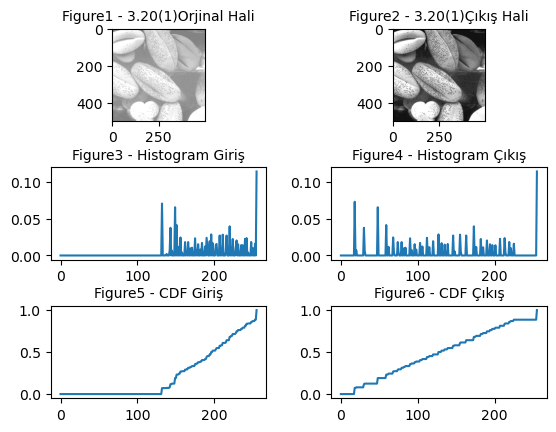

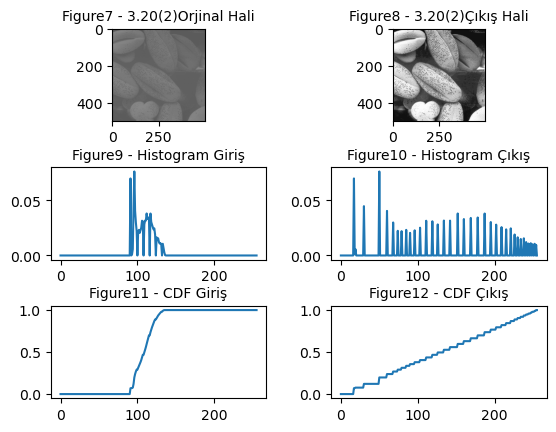

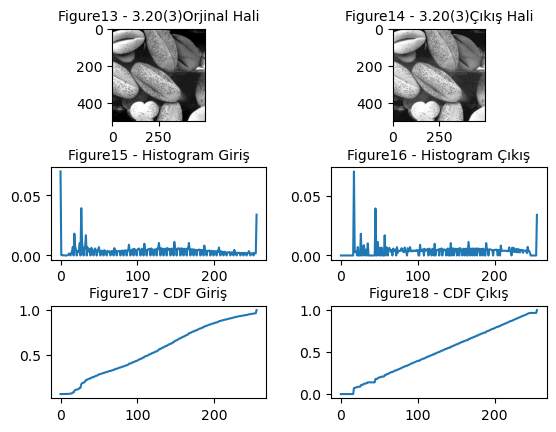

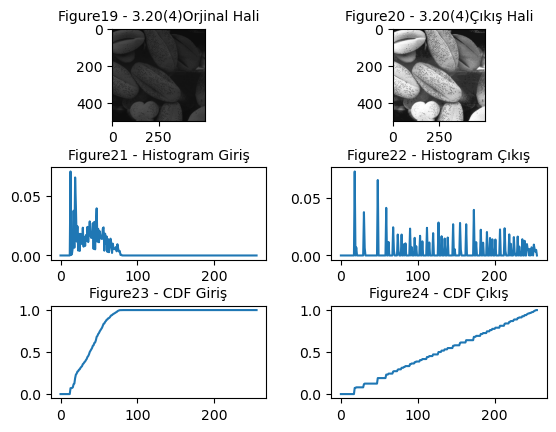

In [1]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli

####################################fonksiyonlar######################
def cdf_function(c,maxval,pdf,cdf):
    cdf[c]=0
    for k in range(maxval+1):
        cdf[c]+=pdf[k]
        if c==k:
            break
    return cdf[c]

def pdf_function(histogram,total):
    a=float(histogram)/float(total)
    return a

def histogram_funtion(height,width,f,k):
    counter=0
    for m in range(height):
        for n in range(width):
            if(f[m][n]==k):
                counter=counter+1
    return counter

def total_function(maxval,histogram):
    total=0
    for k in range(maxval+1):
        total+=histogram[k]
    return total

######################################################################

# okunacak pgm dosyalarının isimleri için array oluşturuldu
pgm_files=["Fig0320(1)(top_left).pgm","Fig0320(2)(2nd_from_top).pgm","Fig0320(3)(third_from_top).pgm","Fig0320(4)(bottom_left).pgm"]

# ekrana bastırılacak figürlerin adlandırmaları için array oluşturuldu
figures=["Figure1 - 3.20(1)Orjinal Hali",
         "Figure3 - Histogram Giriş",
         "Figure5 - CDF Giriş",
         "Figure4 - Histogram Çıkış",
         "Figure6 - CDF Çıkış",
         "Figure2 - 3.20(1)Çıkış Hali",
         
         "Figure7 - 3.20(2)Orjinal Hali",
         "Figure9 - Histogram Giriş",
         "Figure11 - CDF Giriş",
         "Figure10 - Histogram Çıkış",
         "Figure12 - CDF Çıkış",
         "Figure8 - 3.20(2)Çıkış Hali",
         
         "Figure13 - 3.20(3)Orjinal Hali",
         "Figure15 - Histogram Giriş",
         "Figure17 - CDF Giriş",
         "Figure16 - Histogram Çıkış",
         "Figure18 - CDF Çıkış",
         "Figure14 - 3.20(3)Çıkış Hali",
         
         "Figure19 - 3.20(4)Orjinal Hali",
         "Figure21 - Histogram Giriş",
         "Figure23 - CDF Giriş",
         "Figure22 - Histogram Çıkış",
         "Figure24 - CDF Çıkış",
         "Figure20 - 3.20(4)Çıkış Hali",
        ]

# 4 pgm dosyasınında işlenmesi için for döngüsü oluşturuldu
indis=0
for files in range(4):
    
    
    # pgm dosyaları'rb' modunda açılarak okundu.
    with open(pgm_files[files], "rb") as fileObject:
        fileContent=fileObject.read()
    
        # dosyanın ilk satırı geçildi
        i=0
        while fileContent[i]!=10:
            i=i+1

        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
    
    
        # genişlik yükseklik bilgileri elde edildi
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                
                string=''.join(string)
                height=int(string)
                   
                    
                    
        # maxval değeri elde edildi
        i=i+1
        string=[]
        while fileContent[i]!=10:
            maxval=chr(fileContent[i])
            string.append(maxval)       
            i=i+1
    
        string=''.join(string)
        maxval=int(string)
    
    
    
        # piksel değerleri arraya geçirildi
        i=i+1
        b=i
        j=1
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent[i]
                j=j+1
                i=i+1
            
            
            
        # orjinal görüntü ekrana yazdırıldı
        plt.figure()
        plt.subplots_adjust(wspace=0.3,hspace=0.5)
        plt.subplot(321)
        plt.title(figures[indis],fontsize=10)
        plt.imshow(f,cmap='gray',vmin=0, vmax=255)        
        indis=indis+1
            
            
        # görüntünün histogramı elde edildi
        histogram=np.arange(maxval+1)
        for k in range(maxval+1):
            histogram[k]=histogram_funtion(height,width,f,k)
        
        
        # normalize histogram ekrana yazdırıldı
        plt.subplot(323)
        plt.title(figures[indis],fontsize=10)
        plt.plot(np.arange(maxval+1),histogram/(height*width))
        indis=indis+1
    
    
        # histogram değerlerinin toplamı hesaplandı
        total=total_function(maxval,histogram)
        
        
        # görüntünün pdf'i hesaplandı
        pdf=np.arange(float(maxval+1))
        for k in range(maxval+1):
            pdf[k]=pdf_function(histogram[k],total)

            
        # görüntünün cdf'i hesaplandı
        cdf=np.arange(float(maxval+1))
        for c in range(maxval+1):
            cdf[c]=cdf_function(c,maxval,pdf,cdf)
        
        
        # cdf ekrana yazdırıldı
        plt.subplot(325)
        plt.title(figures[indis],fontsize=10)
        plt.plot(np.arange(maxval+1),cdf)
        indis=indis+1
        
        
        # cdf değerlerinden yeni piksel değerleri elde edildi
        pixel2=np.arange(maxval+1)
        for k in range(maxval+1):
            pixel2[k]=math.floor(cdf[k]*255.0)
        
        
        # yeni piksel değerleri arraye geçirildi
        for m in range(height):
            for n in range(width):
                f[m][n]=pixel2[f[m][n]]

        
        # yeni oluşan görüntünün histogramı hesaplandı    
        for k in range(maxval+1):
            histogram[k]=histogram_funtion(height,width,f,k)

        
        # histogram ekrana yazdırıldı
        plt.subplot(324)
        plt.title(figures[indis],fontsize=10)
        plt.plot(np.arange(maxval+1),histogram/(height*width))
        indis=indis+1

        
        # yeni histogram değerlerinin toplamı hesaplandı
        total=total_function(maxval,histogram)

        # yeni görüntünün pdf'i hesaplandı
        pdf=np.arange(float(maxval+1))
        for k in range(maxval+1):
            pdf[k]=pdf_function(histogram[k],total)

        # yeni görüntünün cdf'i hesaplandı
        cdf=np.arange(float(maxval+1))
        for c in range(maxval+1):
            cdf[c]=cdf_function(c,maxval,pdf,cdf)

        
        # yeni görüntünün cdf'i ekrana yazdırıldı
        plt.subplot(326)
        plt.title(figures[indis],fontsize=10)
        plt.plot(np.arange(maxval+1),cdf)
        indis=indis+1

        # yeni görüntü ekrana yazdırıldı
        plt.subplot(322)
        plt.title(figures[indis],fontsize=10)
        plt.imshow(f,cmap='gray',vmin=0, vmax=255)   
        indis=indis+1



# Sonuç

In [ ]:
# Bu bölümde görüntünün histogram, pdf ve cdf verileri elde edildi
# histogram grafiği görüntüdeki piksel değerlerinin hangisinden kaç tane olduğunun bilgisi verir
# pdf ise olasılık dağılım fonksiyonudur. her piksel için olan histogram verisinin genele oranını verir.
# cdf ise pdf değerlerinin katlanarak toplanmasıyla oluşur.
# elde edilen cdf değerleri uniform edilerek yeni görüntü elde edilmiştir.

# farklı biçimlerdeki görüntülerin cdf'leri normalize edilerek oluşturulan yeni görüntüler birbirinin aynısıdır.
# bu sayede bir görüntünün farklı koşullardaki halleri uniform edilerek sabit bir görüntü elde edilebilir.
# uniform olmayan histogram değerleri belli bir aralıklta yığılırken uniform histogram tüm piksel aralığını yayılmıştır.
# uniform olmayan cdf değerleri belli aralıklarda sabitken uniform cdf'ler sabit eğimli bir doğru denklemi gibi davranır.

# 3.38

Dosya bilgisi :

P5 pgm formatı
width= 466
height= 540
maxval= 255


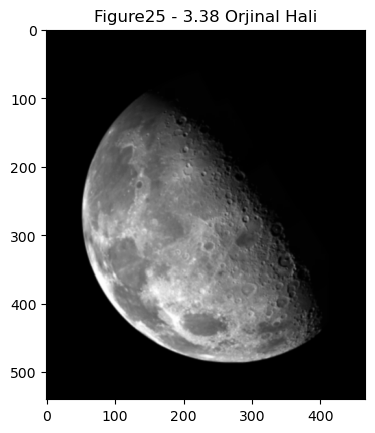

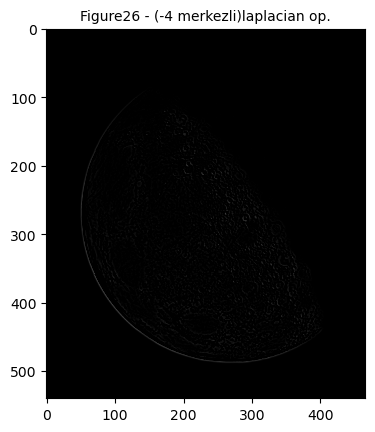

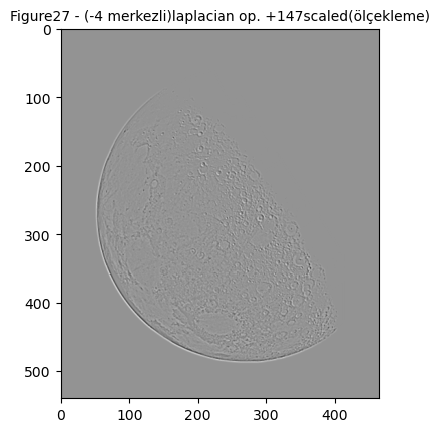

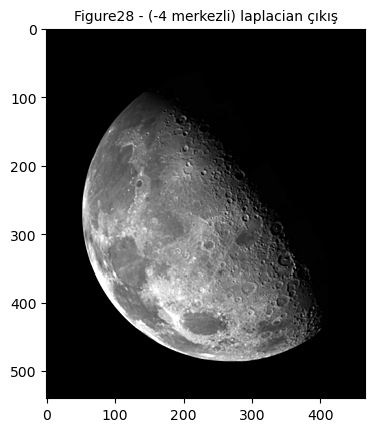

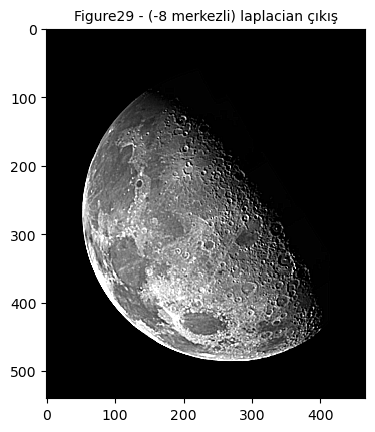

In [2]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli

###########################fonksiyonlar###########################
def laplacian_4(height,width,f,m,n,r,s):
    if ((m+r)>(height-1)) | ((n+s)>(width-1)) | ((m+r)<0) | ((n+s)<0):
        a=0
    else:
        if ((r==-1)&(s==-1))|((r==-1)&(s==1))|((r==1)&(s==-1))|((r==1)&(s==1)):
            a=0
        if ((r==-1)&(s==0))|((r==1)&(s==0))|((r==0)&(s==-1))|((r==0)&(s==1)):
            a=f[m+r][n+s]
        if (r==0)&(s==0):
            a=-4*f[m+r][n+s]
                        
    return a


def laplacian_8(height,width,f,m,n,r,s):
   
    if ((m+r)>(height-1)) | ((n+s)>(width-1)) | ((m+r)<0) | ((n+s)<0):
        a=0
    else:
        if ((r==-1)&(s==-1))|((r==-1)&(s==1))|((r==1)&(s==-1))|((r==1)&(s==1))|((r==-1)&(s==0))|((r==1)&(s==0))|((r==0)&(s==-1))|((r==0)&(s==1)):
            a=f[m+r][n+s]
                        
        if (r==0)&(s==0):
            a=-8*f[m+r][n+s]     
                        
    return a

####################################################################


#Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
with open("Fig0338(a)(blurry_moon).pgm", "rb") as fileObject:
    fileContent=fileObject.read()
    

    #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
    print('Dosya bilgisi :\n')
    i=0
    while fileContent[i]!=10:
        if i==0:
            if (fileContent[0]==80) & (fileContent[1]==53):
                print('P5 pgm formatı')  
            else:
                print('P5 pgm formatı değil')
        i=i+1

    
    # '#' ile başlayan satır geçildi.
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1
                
    
    # genişlik yükseklik bilgileri yazdırıldı
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1  
        else:
            string=[]
            
            while fileContent[i]!=32:
                width=chr(fileContent[i])
                string.append(width)       
                i=i+1
                
            string=''.join(string)
            width=int(string)
            print("width=",width)
            i=i+1
            string=[]
            
            while fileContent[i]!=10:
                
                height=chr(fileContent[i])
                string.append(height)
                i=i+1
                
            string=''.join(string)
            height=int(string)
            print("height=",height)
                     
            
    # maxval değeri yazdırıldı
    i=i+1
    string=[]
    while fileContent[i]!=10:
        maxval=chr(fileContent[i])
        string.append(maxval)       
        i=i+1
    
    string=''.join(string)
    maxval=int(string)
    print("maxval=",maxval)
    
    
    
    
    
    
    # piksel değerleri arraya geçirildi
    i=i+1
    b=i
    f=np.arange(height*width).reshape((height,width))      
    f2=np.arange(height*width).reshape((height,width))      
    
    for m in range(height):
        for n in range(width):
            f[m][n]=fileContent[i]
            i=i+1
            
            
    # orjinal görüntü ekrana yazdırıldı
    plt.figure()
    plt.title("Figure25 - 3.38 Orjinal Hali")
    plt.imshow(f,cmap='gray',vmin=0, vmax=255)        
            
        
    # array üzerinde yapılan işlemlerin tutulması için arrayler oluşturuldu
    g=np.arange(height*width).reshape((height,width))     
    g2=np.arange(height*width).reshape((height,width))     
    g3=np.arange(height*width).reshape((height,width))     

    
    # -4 ve -8 merkez katsayılı laplacian operatoru uygulandı
    for m in range(height):
        for n in range(width):
            g[m][n]=0
            g2[m][n]=0
            for r in range(-1,2):
                for s in range(-1,2):
                    g[m][n]=g[m][n]+laplacian_4(height,width,f,m,n,r,s)
                    g2[m][n]=g2[m][n]+laplacian_8(height,width,f,m,n,r,s)
                        

    # -4 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış oldu. 
    for m in range(height):
        for n in range(width):
            f[m][n]=f[m][n]-g[m][n]            
            
            
    # -4 merkezli laplacian operatorune 147 gibi 0'a yakın değerleri ortaya(gri) çekecek şekilde 147 gibi bir
    #değer eklenerek scaled(ölçekleme) yapıldı 
    for m in range(height):
        for n in range(width):
            g3[m][n]=g[m][n]+147            
            
            
    # -8 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış oldu.
    for m in range(height):
        for n in range(width):
            f2[m][n]=f[m][n]-g2[m][n]     
            
            
    # -4 merkezli laplacian operator çıktısı
    plt.figure()      
    #plt.subplot(221)
    #plt.subplots_adjust(wspace=1.5,hspace=0.5)
    plt.title("Figure26 - (-4 merkezli)laplacian op.",fontsize=10)
    plt.imshow(g,cmap='gray',vmin=0, vmax=255)        
        
        
    # -4 merkezli laplacian operatorune 147 ekleyerek scaled(ölçekleme) çıktısı
    plt.figure()
    #plt.subplot(222)
    plt.title("Figure27 - (-4 merkezli)laplacian op. +147scaled(ölçekleme)",fontsize=10)
    plt.imshow(g3,cmap='gray',vmin=0, vmax=255)
        
        
    # -4 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış halinin çıktısı
    plt.figure()
    #plt.subplot(223)
    plt.title("Figure28 - (-4 merkezli) laplacian çıkış",fontsize=10)
    plt.imshow(f,cmap='gray',vmin=0, vmax=255)   
        
        
    # -8 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış halinin çıktısı
    plt.figure()
    #plt.subplot(224)
    plt.title("Figure29 - (-8 merkezli) laplacian çıkış",fontsize=10)
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)

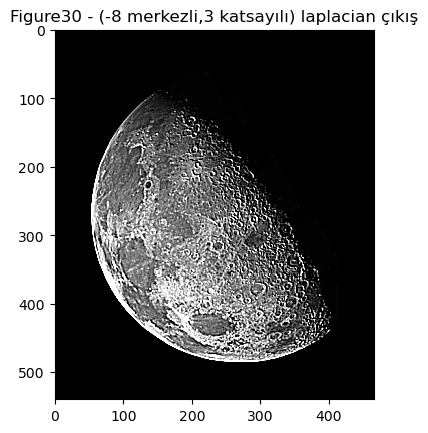

In [3]:
    # -8 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış oldu.
    # laplacian operatörünün katsayısı 3 seçildi
    for m in range(height):
        for n in range(width):
            f2[m][n]=f[m][n]-3*g2[m][n]  
            
    # -8 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış halinin çıktısı
    plt.figure()
    plt.title("Figure30 - (-8 merkezli,3 katsayılı) laplacian çıkış")
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)           

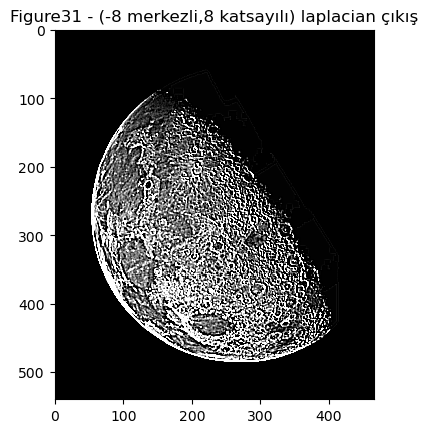

In [4]:
    # -8 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış oldu.
    # laplacian operatörünün katsayısı 8 seçildi
    for m in range(height):
        for n in range(width):
            f2[m][n]=f[m][n]-8*g2[m][n]  
            
    # -8 merkezli laplacian operatoru ilgili piksel değerinden çıkartılıp filtre uygulanmış halinin çıktısı
    plt.figure()
    plt.title("Figure31 - (-8 merkezli,8 katsayılı) laplacian çıkış")
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)   

# Sonuç

In [ ]:
# bu bölümde keskinleştirme(sharpening) işlemi gerçekleştirildi
# figure 25'de orjinal görüntü bulanık bir ay görüntüsüdür.
# bu görüntüye -4 merkezli ve -8 merkezli laplacian operatörleri uygulandı
# figure 26'da -4 merkezli operatör uygulanmış hali karanlık ve belirsiz bir görüntüdür.
# figure 27'de -4 merkezli laplacian operatör uygulanmış haline +147 eklenerek ölçeklenmiştir(scaled). Siyah görüntü griye dönüştürülmüştür. 

# NOT: Ölçekleme(scaled) işlemi doğru yapılmamış olabilir

# figure 28'de -4 merkezli laplacian operatör ile keskinleştirme işleminin sonucu verilmiştir. Görüntü orjinaline göre keskinleşmiştir.
# figure 29'da -8 merkezli laplacian operatör ile keskinleştirme işleminin sonucu verilmiştir. Görüntü -4 merkezliye göre daha keskin hale gelmiştir.

# görüntüyü daha keskin hale getirmek için -4 merkezli laplacian yerine -8 merkezli laplacian kullanılabilir. Figure28 ve 29'da bu farklar gözükmektedir.
# ayrıca g=f-cfs denklemindeki c katsayısı arttırılabilir.

# -8 merkezli laplacian operatörü için:
# figure 30'da c katsayısı 3 yapılmıştır. görüntü daha da keskinleşmiştir.
# figure 31'de c katsayısı 8 yapılmıştır. Görüntü bozulmaya başlamıştır. Kraterler üzerinde gereksiz detaylar ortaya çıkmıştır.


# 3.40

Dosya bilgisi :

P5 pgm formatı
width= 320
height= 138
maxval= 255


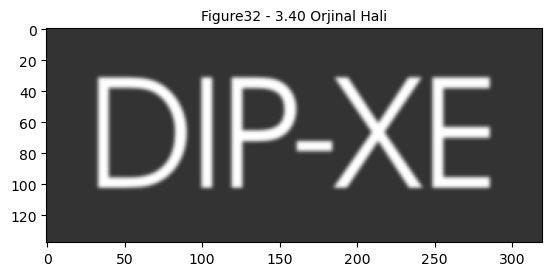

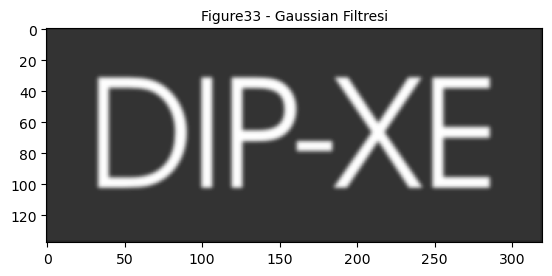

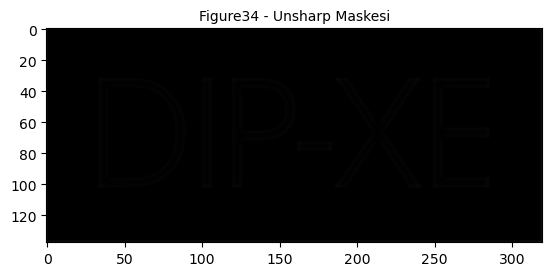

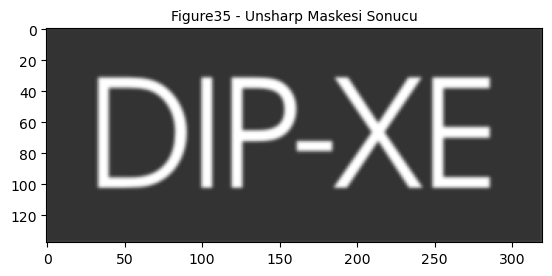

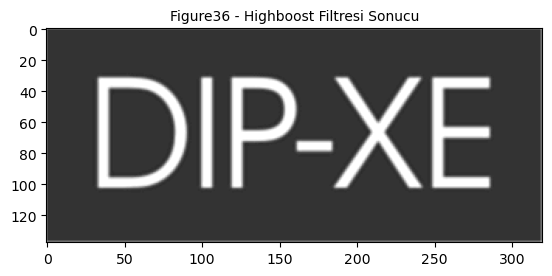

In [5]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli

######################################fonksiyonlar################
def gaussian(height,width,f,m,n,r,s):
    if ((m+r)>(height-1)) | ((n+s)>(width-1)) | ((m+r)<0) | ((n+s)<0):
        a=0
    else:
        if ((r==-1)&(s==-1))|((r==-1)&(s==1))|((r==1)&(s==-1))|((r==1)&(s==1)):
            a=f[m][n]
        if ((r==-1)&(s==0))|((r==1)&(s==0))|((r==0)&(s==-1))|((r==0)&(s==1)):
            a=2*f[m+r][n+s]
        if (r==0)&(s==0):
            a=4*f[m+r][n+s]
                        
    return a


def unsharp(f,g,m,n):                
    a=f[m][n]-g[m][n]
    return a
            
def unsharp_highboost(f,fs,m,n,k):
    a=f[m][n]+k*fs[m][n]
    return a


#################################################################



#Fig0340(a)(dipxe_text).pgm dosyası 'rb' modunda açılarak okundu.
with open("Fig0340(a)(dipxe_text).pgm", "rb") as fileObject:
    fileContent=fileObject.read()
    

    #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
    print('Dosya bilgisi :\n')
    i=0
    while fileContent[i]!=10:
        if i==0:
            if (fileContent[0]==80) & (fileContent[1]==53):
                print('P5 pgm formatı')  
            else:
                print('P5 pgm formatı değil')
        i=i+1

    
    # '#' ile başlayan satır geçildi.
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1
                
    
    # genişlik yükseklik bilgileri yazdırıldı
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1  
        else:
            string=[]
            
            while fileContent[i]!=32:
                width=chr(fileContent[i])
                string.append(width)       
                i=i+1
                
            string=''.join(string)
            width=int(string)
            print("width=",width)
            i=i+1
            string=[]
            
            while fileContent[i]!=10:
                
                height=chr(fileContent[i])
                string.append(height)
                i=i+1
                
            string=''.join(string)
            height=int(string)
            print("height=",height)
                     
            
    # maxval değeri yazdırıldı
    i=i+1
    string=[]
    while fileContent[i]!=10:
        maxval=chr(fileContent[i])
        string.append(maxval)       
        i=i+1
    
    string=''.join(string)
    maxval=int(string)
    print("maxval=",maxval)
    
    
    
    
    
    
    # Orjinal görüntü, unsharp maskesi, unsharp maske çıktısı, highboost filtresi çıktısı için arraylar oluşturuldu
    i=i+1
    f=np.arange(height*width).reshape((height,width))      
    fs=np.arange(height*width).reshape((height,width))      
    f2=np.arange(height*width).reshape((height,width))      
    f3=np.arange(height*width).reshape((height,width))
    
    # piksel değerleri arraya geçirildi
    for m in range(height):
        for n in range(width):
            f[m][n]=fileContent[i]
            i=i+1
            
            
    # orjinal görüntü ekrana yazdırıldı
    plt.figure()      
    plt.title("Figure32 - 3.40 Orjinal Hali",fontsize=10)
    plt.imshow(f,cmap='gray',vmin=0, vmax=255) 
        
        
    
    # gaussian maskesinin oluşturulması için array oluşturuldu
    g=np.arange(height*width).reshape((height,width))     
  

    # her piksele gaussian maskesi uygulandı
    for m in range(height):
        for n in range(width):
            g[m][n]=0
            for r in range(-1,2):
                for s in range(-1,2):
                    g[m][n]=g[m][n]+gaussian(height,width,f,m,n,r,s)
                    
            g[m][n]=math.floor(g[m][n]/16)

                        
                        
    # unsharp maskesi, unsharp maske çıktısı ve highboost filtre(katsayı=5) çıktısı elde edildi 
    for m in range(height):
        for n in range(width):
            fs[m][n]=unsharp(f,g,m,n)
            f2[m][n]=unsharp_highboost(f,fs,m,n,1)
            f3[m][n]=unsharp_highboost(f,fs,m,n,5)
            

    # Gaussian filtresi ekrana yazdırıldı
    plt.figure()
    plt.title("Figure33 - Gaussian Filtresi",fontsize=10)
    plt.imshow(g,cmap='gray',vmin=0, vmax=255)      
        
    # Unsharp maskesi ekrana yazdırıldı    
    plt.figure()
    plt.title("Figure34 - Unsharp Maskesi",fontsize=10)
    plt.imshow(fs,cmap='gray',vmin=0, vmax=255) 
    
    # Unsharp maskesi sonucu ekrana yazdırıldı
    plt.figure()
    plt.title("Figure35 - Unsharp Maskesi Sonucu",fontsize=10)
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)      
        
    # Highboost filtresi sonucu ekrana yazdırıldı
    plt.figure()
    plt.title("Figure36 - Highboost Filtresi Sonucu",fontsize=10)
    plt.imshow(f3,cmap='gray',vmin=0, vmax=255)     
    

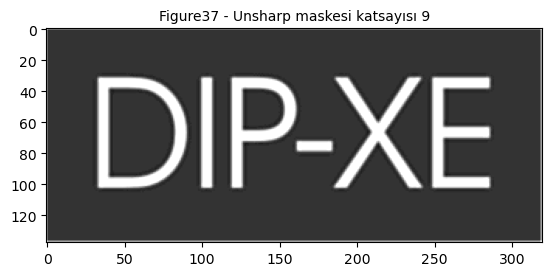

In [6]:
    # highboost filtre çıktısı elde edildi (katsayı=9)
    for m in range(height):
        for n in range(width):
            f2[m][n]=unsharp_highboost(f,fs,m,n,9)
            

    # Highboost filtresi sonucu ekrana yazdırıldı (katsayı=9)
    plt.figure()
    plt.title("Figure37 - Unsharp maskesi katsayısı 9",fontsize=10)
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)   

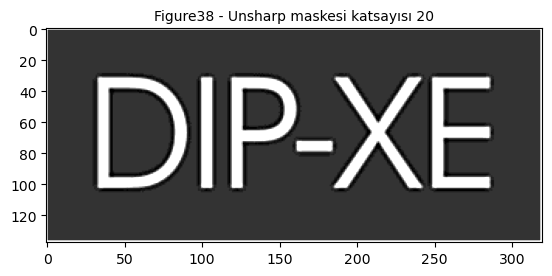

In [7]:
    # highboost filtre çıktısı elde edildi (katsayı=20)
    for m in range(height):
        for n in range(width):
            f2[m][n]=unsharp_highboost(f,fs,m,n,20)
            

    # Highboost filtresi sonucu ekrana yazdırıldı (katsayı=20)
    plt.figure()
    plt.title("Figure38 - Unsharp maskesi katsayısı 20",fontsize=10)
    plt.imshow(f2,cmap='gray',vmin=0, vmax=255)   

In [ ]:
# bu bölümde unsharp(keskinleştirme giderme işlemi) uygulanmıştır.
# figure 32'de görüntü bulanıktır.
# figure 33'de gaussian maskesi uygulandıktan sonra bulanıklık artmıştır.

# Not: figure 34'de unsharp maskesi uygulandıktan sonra görüntü ödevdeki resme göre gri olması gerekirken siyah olmuştur.

# figure 34 için ödevdeki görüntü elde edilememiştir.
# figure 35'de unsharp işleminden(k=1) sonra görüntü çok azda olsa keskinleşmiştir. (g=f+kfs)
# figure 36'da g=f+kfs denklemindeki k katsayısı k>1 olacak şekilde k=5 için highboost filtresi uygulanmıştır görüntü daha keskin hale gelmiştir.

# görüntüyü daha keskin hale getirmek için g=f+kfs denklemindeki k katsayısı daha büyük seçilebilir.
# figure 37'de k=9 yapılmış görüntü daha da keskinleşmiştir.
# figure 38'de k=20 yapılmış görüntğ daha da keskinleşmiş ama harfler etrafında siyah çizgiler oluşmaya başlamıştır.

# unsharp(keskinleştirmeyi giderme) işlemi olması gerekirken görüntü sharpening(keskinleştirme) işleminde olduğu gibi keskinleşmiştir.
# bu olayın matığını tam anlayamadım